<a href="https://colab.research.google.com/github/dhanesh-vaghasiya/car-model-predictor/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 📦 Install all required libraries (Colab-friendly)
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost tqdm


In [3]:
!pip install kaggle

In [4]:
# 🔧 Core Libraries
import numpy as np
import pandas as pd

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 🧼 Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 🤖 Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 📈 Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [5]:
import kagglehub
kagglehub.login()
# Download latest version
path = kagglehub.dataset_download("CooperUnion/cardataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardataset


In [6]:
df = pd.read_csv(path + '/data.csv')

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
df.sample(50)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
7224,Volkswagen,New Beetle,2010,regular unleaded,150.0,5.0,AUTOMATIC,front wheel drive,2.0,NaN,Compact,Convertible,28,20,873,26390
2943,Toyota,Corolla,2016,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,30,2031,19835
753,Volvo,740,1992,regular unleaded,114.0,4.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Midsize,Wagon,26,18,870,2000
5316,Mercedes-Benz,GLE-Class,2016,premium unleaded (required),302.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,24,18,617,51100
7534,Nissan,Pathfinder,2017,regular unleaded,284.0,6.0,AUTOMATIC,four wheel drive,4.0,Crossover,Large,4dr SUV,26,19,2009,37790
10849,Nissan,Truck,1995,regular unleaded,134.0,4.0,MANUAL,rear wheel drive,2.0,NaN,Compact,Regular Cab Pickup,24,19,2009,2000
2436,Toyota,Celica,2004,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,30,23,2031,17570
1511,Cadillac,ATS Coupe,2016,regular unleaded,335.0,6.0,AUTOMATIC,all wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,19,1624,50675
1928,Volkswagen,Beetle,2015,regular unleaded,170.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,33,24,873,23605
2666,Chevrolet,C/K 1500 Series,1999,regular unleaded,230.0,8.0,AUTOMATIC,four wheel drive,3.0,NaN,Large,Extended Cab Pickup,17,13,1385,4098


In [13]:
df['Market Category'] = df['Market Category'].fillna('None')


In [14]:
df['Market Category'] = df['Market Category'].apply(lambda x: x.split(','))


In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
market_cat_df = pd.DataFrame(
    mlb.fit_transform(df['Market Category']),
    columns=mlb.classes_,
    index=df.index
)
df = pd.concat([df.drop(columns=['Market Category']), market_cat_df], axis=1)


In [16]:
df.drop(columns=["None"])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,...,1,0,0,0,0,1,0,0,1,0


In [17]:
df.dropna(subset=['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors'], inplace=True)
df.reset_index(drop=True, inplace=True)

le = LabelEncoder()
df['Vehicle Style'] = le.fit_transform(df['Vehicle Style'])

In [18]:
df.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


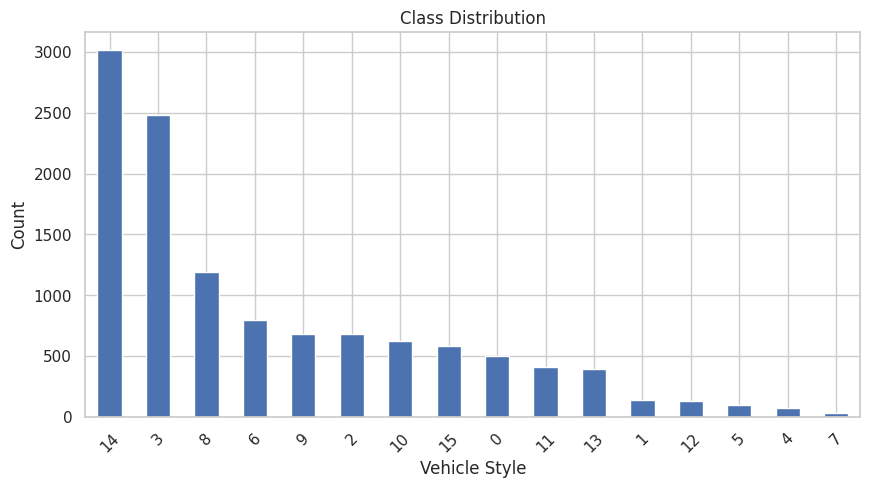

In [19]:
df['Vehicle Style'].value_counts().plot(kind='bar', figsize=(10, 5), title='Class Distribution')
plt.ylabel("Count")
plt.xlabel("Vehicle Style")
plt.xticks(rotation=45)
plt.show()


In [20]:
X = df.drop(columns=['Vehicle Style'])  # Features
y = df['Vehicle Style']                 # Target

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)